<a href="https://colab.research.google.com/github/TerradasExatas/IA_e_Machine_Learning/blob/main/IA_ConvNN_classificacao_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
#https://towardsdatascience.com/convolutional-neural-networks-for-beginners-using-keras-and-tensorflow-2-c578f7b3bf25
#https://github.com/jorditorresBCN/python-deep-learning/blob/master/08_redes_neuronales_convolucionales.ipynb

train imagens original shape: (60000, 28, 28)
train labels original shape: (60000,)


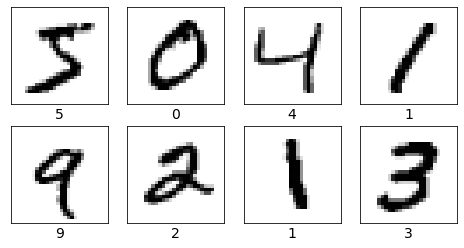

train images new shape: (60000, 28, 28, 1)
Model: "rede_IF_CNN_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 12)        312       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 24)        2616      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 24)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense

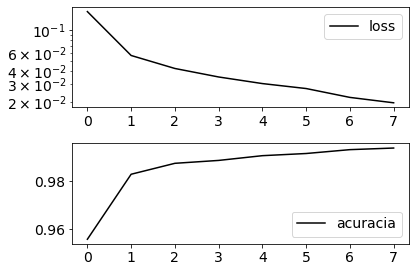

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#importa o dataset (as imagens da base "mnist")
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#inspeciona o data set
print('train imagens original shape:',train_images.shape)
print('train labels original shape:',train_labels.shape)

plt.rcParams.update({'font.size':14})
plt.figure(figsize=(8,4))
for i in range(2*4):
  plt.subplot(2,4,i+1)
  plt.xticks([]);plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(str(train_labels[i]))
plt.show()

#prepara o data set
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#inspeciona os dados preparados
print ('train images new shape:',train_images.shape)

N_class=10
#Criando a rede neural
model = tf.keras.Sequential(name='rede_IF_CNN_MNIST')
#Adicionando as camadas
model.add(tf.keras.layers.Conv2D(12, (5, 5), 
                                 activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(24, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(N_class, activation='softmax'))

#compilando a rede
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# treinando a rede
history=model.fit(train_images, train_labels,epochs=8,verbose=1)

#mostra a performace do treinamento da rede
plt.figure()
plt.subplot(2,1,1);plt.semilogy(history.history['loss'],'k')
plt.legend(['loss'])
plt.subplot(2,1,2);plt.plot(history.history['accuracy'],'k')
plt.legend(['acuracia'])
plt.tight_layout()

#testando a rede com os dados de teste
pred = model.predict(test_images)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n accuracia dos dados de teste: ', test_acc)

#encontra a classe de maior probabilidade
labels_pred=np.argmax(pred,axis=1)
#mostra 15 resultados esperados e os alcançados lado a lado
print('data and pred = \n',np.concatenate(
    (test_labels[None].T[0:15], labels_pred[None].T[0:15]),axis=1))